# **Proyecto integrador del módulo Analista de Datos**

### Docentes:
- Marcos Ugarte
- Nahuel Pratta

### Alumnos integrantes:
- Erick López
- Christian Nüesch
- Débora Zurita


<br>
<br>
<br>

---

<br>

# **Descripción del proyecto**


El proyecto consiste en el análisis a través de diferentes herramientas profesionales, de los datos recolectados a través de un peinado web (o web scrapping) con la información de varias características de automóviles ordenadas en doce diferentes columnas.

Este procesamiento y limpieza de los datos para realizar un posterior análisis se realizó con la finalidad de articular lo visto en los diferentes espacios curriculares de la carrera Ciencia de Datos e Inteligencia Artificial. Estos espacios curriculares son "Estadística y Exploración de Datos", "Procesamiento de Datos" y "Ciencia de Datos".

<br>

**Los objetivos generales del proyecto** son desarrollar la capacidad de organizar y planificar eficazmente, aplicando loss conocimientos para identificar problemas relevantes en el contexto profesional. Se deberá comunicar los hallazgos de manera clara, tanto de forma oral como escrita. Asimismo se busca el razonamiento crítico y desarrollar actitudes importantes como la precisión, la revisión crítica, la tolerancia y el compromiso ético con la igualdad de oportunidades, sin discriminación por sexo, raza o religión, y con atención a la diversidad. Por último, se busca mejorar la capacidad para tomar decisiones y trabajar en equipo, colaborando en entornos multidisciplinares para alcanzar los objetivos propuestos.

<br>

**Los objetivos específicos del proyecto** son la capacidad de limpiar y transformar los datos crudos para poder eliminar errores, valores atípicos, valores ausentes y demás inconsistencias; para luego aplicar análisis gráficos y descriptivos, y relacionar diferentes variables.


<br>
<br>
<br>

---

<br>

# **PRIMERA ENTREGA**


<br>

Para empezar a trabajar con el dataset lo primero que hacemos es importar las librerías de Python que vamos a utilizar.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<br>
<br>

Luego leemos los datos desde el archivo que los contiene, en este caso un archivo de valores separados por comas (csv):


```
autos_argentina_02.csv
```



In [ ]:
data = pd.read_csv('autos_argentina_02.csv')

# Código para el caso de que se presenten incompatibilidades con la codificación
# del archivo
#data = pd.read_csv('autos_argentina_02.csv', delimiter=',', encoding='utf-8')

<br>
<br>

### **Análisis descriptivo del dataset**

Lo siguiente que vamos a realizar es imprimir los primeros diez registros del dataset para poder hacernos una idea de qué se trata:

In [ ]:
print(data.head(10))

<br>
<br>

También podemos imprimir las últimas filas del dataset (tanto para ```head``` como para ```tail``` por defecto siempre se imprimen cinco filas):

In [ ]:
data.tail()

<br>
<br>

Podemos imprimir todo el dataset, aunque *se debe tener cuidado al realizar esta operación* si el dataset es muy grande, ya que todo deberá ser cargado en memoria.

In [ ]:
print(data.to_string())

<br>
<br>

También vamos a generar una descripción general del dataset:

In [ ]:
data.describe()

<br>
<br>

Con el método ```info()``` podemos ver el número de filas y columnas, el tipo de datos de cada columna, el número de valores no nulos de cada columna y el uso de memoria del dataset:

In [ ]:
data.info()

<br>
<br>

Se pueden visualizar diferentes características del dataset:

In [ ]:
# Los nombres de las columnas:
data.columns

Index(['Precio', 'Marca', 'Modelo', 'Año', 'Color', 'Combustible', 'Puertas',
       'Caja', 'Motor', 'Carrocería', 'Kilómetros', 'Moneda'],
      dtype='object')

<br>

In [ ]:
# La cantidad total de celdas o elementos del dataset:
data.size

<br>

In [ ]:
# Una lista con los nombres de las filas del dataset (en nuestro caso no tiene
# mucho sentido esta información, pero sí puede servir para otros casos)
data.index

<br>

In [ ]:
# Con esta instrucción podemos ver si faltan datos en alguna fila
data.count(axis='columns')

<br>

In [ ]:
# Con esta instrucción podemos ver si faltan datos en alguna columna

# En nuestro caso se puede ver que en las columnas 'Color', 'Caja', 'Motor' y
# 'Carrocería' hay datos ausentes (en todos los casos el total debe se 510)
data.count(axis='index')

<br>

In [ ]:
# Podemos observar qué cantidad hay de cada elemento en cada columna, simplemente
# ajustando o indicando la columna a la que nos referimos
data.value_counts('Marca')

<br>

In [ ]:
# Podemos obtener exactamente la misma información que antes, pero cambiando la
# forma que referenciamos la columna
data['Marca'].value_counts()

<br>

In [ ]:
# Valores válidos sobre el total

# Esta instancia es un poco más compleja, ya que se debe utiliza una combinación
# de varios varios métodos

# Como la operación se debe realizar varias veces, empaquetamos todo el código
# en una función, y así lo reutilizamos al código

def ausentes_y_texto(columna):
  columna_analizada = data[columna]
  datos_ausentes = columna_analizada.isna().sum()
  datos_de_texto = columna_analizada.apply(lambda x: isinstance(x, str)).sum()
  print(f'Número de datos ausentes en "{columna}": {datos_ausentes}')
  print(f'Número de datos de texto en "{columna}": {datos_de_texto}')
  print('\n')

ausentes_y_texto('Precio')
ausentes_y_texto('Año')
ausentes_y_texto('Puertas')
ausentes_y_texto('Motor')
ausentes_y_texto('Kilómetros')


<br>
<br>

Un ==análisis extra== sería el siguiente: como estamos trabajando con información sobre autos puestos a la venta, sería bueno saber cuántos modelos hay en total disponibles en la plaza, y su marca comercial correspondiente. Para ello realizamos las siguientes operaciones:

**Nota:** el renderizador de Google no reconoce la instrucción de Markdown de resaltado (el signo igual doble `==`)

In [ ]:
# Ajustamos la configuración de "Pandas" para mostrar todas las filas

# Igual que en un ejemplo anterior, esto hará que se muestren todas las filas
# obtenidas, por lo que en determinados casos podría hacer que se consuman
# muchos recursos del sistema. En caso que se desee que no ocurra esto, se
# comenta esta línea y se vuelva a ejecutar el notebook (ya que "Pandas" habrá)
# quedado precargado para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Seleccionamos las columnas relevantes
columna_2 = data.iloc[:, 1]  # Segunda columna
columna_3 = data.iloc[:, 2]  # Tercera columna

# Creamos un DataFrame con las columnas seleccionadas
data_seleccion = pd.DataFrame({'Marca': columna_2, 'Modelo': columna_3})

# Eliminamos duplicados basados en la tercera columna
data_unicos = data_seleccion.drop_duplicates(subset='Modelo')

# Imprimimos los valores únicos de la tercera columna y sus valores asociados en la segunda columna
print(data_unicos)


<br>
<br>

### **Análisis estadísticos del dataset**

A partir de aquí se obtienen diferentes datos e informaciones de tipo estadístico del dataset con el que estamos trabajando (siempre para las columnas con datos numéricos)

In [ ]:
# Menor de los datos

# Para la columna "Motor" no podemos obtener de momento el valor mínimo porque
# hay valores mal registrados (lo mismo va a ocurrir para todos los análisis que
# impliquien valores numéricos)

data[['Precio', 'Año', 'Puertas', 'Kilómetros']].min()

<br>

In [ ]:
# Mayor de los datos
data[['Precio', 'Año', 'Puertas', 'Kilómetros']].max()

<br>

In [ ]:
# Media de los datos
data[['Precio', 'Año', 'Puertas', 'Kilómetros']].mean()

<br>

In [ ]:
# La varianza de los datos
data[['Precio', 'Año', 'Puertas', 'Kilómetros']].var()

<br>

In [ ]:
# La desviación estándar de los datos
data[['Precio', 'Año', 'Puertas', 'Kilómetros']].std()

<br>

In [ ]:
# Aquí volvemos a utilizar el método 'describe()' pero indicándolo de forma
# específica las columnas sobre las que queremos trabajar, y obtenemos la
# misma información que hasta ahora, pero con el añadido de los cuartiles
data[['Precio', 'Año', 'Puertas', 'Kilómetros']].describe()

<br>
<br>
<br>

---

<br>

# **SEGUNDA ENTREGA**



Para esta segunda entrega se procederá a trabajar con las librerías de Python `pandas` y `matplotlib`.

En la primera parte de la segunda entrega manipularemos el dataset con el que veníamos trabajando con el objetivo de "curarlo" o dejar los datos tratados para poder operar con ellos, por ejemplo generando gráficos  para entenderlos de una manera visual, y por tanto más intuitiva. Este tratamiento de los datos siempre se debe realizar, más aun cuando se trabaja con grandes paquetes de datos, los cuales en la mayoría de los casos incluirán inconsistencias.

> **Nota:** en el caso de nuestro dateset, se presentaron todas las inconsistencias estudiadas en el espacio curricular **"Procesamiento de Datos"**, excepto que no tenía filas duplicadas, por tanto se va a manipular el dataset original para generar algunos duplicados y poder aplicar lo aprendido; es por eso que para esta segunda entrega se trabajará con el archivo `autos_argentina_02.csv`, que es el mismo que el anterior pero con algunos duplicados.

En la segunda parte de esta entrega, como se dijo generaremos una serie de gráficos usando librerías específicas, para poder tener un abordaje visual de los datos trabajados, y entenderlos mejor.

<br>
<br>

## **Primera parte**

Para empezar a trabajar con esta segunda entrega, comenzaremos por leer nuevamente el dataset para poder partir de cero con lo que vayamos a hacer.


In [ ]:
data = pd.read_csv('autos_argentina_02.csv')

<br>
<br>

### 1) Datos ausentes

Lo primero que vamos a abordar es el tratamiento de datos ausentes, lo cual se presenta cuando hay celdas vacías. En este caso las soluciones pueden ser de dos tipos:
- rellenar la celda vacía con alguna de las siguientes opciones (entre muchas):
- usando la media, la mediana o la moda de los valores de esa columna (estas opciones excepto la moda, son válidas si en la columna tratada los valores son de tipo numérico)
- reemplazar directamente valores vacíos
- eliminar la fila completa donde se encuentra la celda vacía. Esta solución se utiliza cuando se dispone de grandes volúmenes de datos, por tanto la eliminación de alguna celda vacía no comprometerá la cantidad o la calidad de la información disponible. Es la opción más sencilla y la que utilizamos a lo último, para tener la oportunidad de generar alguna transformación antes

En nuestro caso todas las columnas están completas, excepto:
- `Color` que le faltan once datos: *para no perder muchos datos, se completarán todos los ausentes con el colo 'Blanco'*
- `Caja` que le falta sólo un dato: *aquí reemplazaremos usando la moda*
- `Motor` que le faltan diez datos: *también eliminamos todas las filas*
- `Carrocería` que le falta sólo un dato: *completamos de manera directa*

<br>
<br>

Comenzamos reemplazando el único dato ausente en la columna `Caja` usando la moda:


In [ ]:
# Calculamos la moda de la columna 'Caja'
moda_caja = data['Caja'].mode()[0]  # [0] para obtener el primer valor de la moda
                                    # (puede haber varios)

# Rellenamos los valores faltantes en la columna 'Caja' con la moda
data['Caja'].fillna(moda_caja, inplace=True)

# En la fila 213 en la coumna 'Caja' se agrega 'Manual'

<br>
<br>

Luego reemplazamos el dato ausente en `Carrocería` de manera directa usando el método de Pandas `loc`:


In [ ]:
data.loc[280, 'Carrocería'] = 'Hatchback'

# En la fila 280 en la coumna 'Carrería' aparece ahora el tipo 'Hatchback'

<br>
<br>

Ahora completamos todos los ausentes en la columna `Color` con el color `Blanco`, que sería lo más neutro, igual que antes usando el método `.fillna()`:


In [ ]:
data['Color'].fillna('Blanco', inplace=True)

<br>
<br>

Una vez que agregamos algunos datos en celdas vacías, procedemos a eliminar todas las filas que tienen algún valor ausente usando el método de Pandas `.dropna()`. El parámetro `inplace=True` modifica el dataframe original, sin crear una copia.

Faltan algunos datos en la columna `Motor`:


In [ ]:
data.dropna(inplace=True)

<br>
<br>

### 2) Datos en formato incorrecto

Este quizás es el punto más complicado que tengamos al momento de darle tratamiento al dataset con el que trabajamos, ya que va implicar pensar una estrategia para dejar los datos limpios.

Lo primero que haremos es comprobar el tipo de dato de algunas celdas específicas para averiguar con qué estamos trabajando, usando una combinación de `loc` para acceder al valor de una celda, y `type` para obtener el tipo de dato:


In [ ]:
# type(data.loc[1, 'Motor'])
#type(data.loc[2, 'Motor'])
type(data.loc[10, 'Motor'])
data['Motor'].dtypes

dtype('O')

Haciendo diferentes pruebas vemos que la columna `Motor` es del tipo de dato `object`, que en nuestro caso se utiliza para representar cadenas de texto.

Lo que haremos ahora es pasar todo directamente a `str` para poder manipular el contenido de las celdas, y luego pasar nuevamente todo a formato de `float` que es el que nos interesa:


In [ ]:
data['Motor'] = data['Motor'].astype(str)

Lo que vamos a hacer es buscar en la columna `Motor` y en todas las celdas donde haya un punto y modificaremos la celda para dejar únicamente el carácter que está antes del punto, el punto, y el carácter siguiente.

Para lograr esto vamos a usar una combinación de expresiones regulares y la función `.apply()` de Pandas:


In [ ]:
# Primero debemos importar el módulo 're' para trabajar con expresiones regulares
import re

# Luego definimos la función que realizará la operación
def extraer_alrededor_punto(texto):
    match = re.search(r"(.)\.(.)", texto)
    if match:
        return match.group(0)  # Obtenemos los tres caracteres (antes, punto, después)
    else:
        return texto  # Devolvemos el texto original si no hay punto

data['Motor'] = data['Motor'].apply(extraer_alrededor_punto)
#print(data['Motor'].to_string())

Ahora tenemos un problema: en algunas celdas se encuentra un valor de tipo `char` con un dígito, pero sin el `.0`, por lo tanto necesitamos una función que nos "empareje" esos datos.

Para ello volvemos a usar la función `.apply()` y generamos una función que toma un texto como entrada y con `.isdigit()` verifica si el texto contiene solo dígitos.
Si es así, devuelve el texto original con `.0` agregado al final, y si no, devuelve el texto original sin modificaciones.


In [ ]:
# Función para emparejar los datos
def agregar_punto_cero(texto):
    if texto.isdigit():  # Verificamos si el texto contiene solo dígitos
        return texto + '.0'  # Agregamos '.0' si es un dígito aislado
    else:
        return texto  # Devolvemos el texto original si no es un dígito aislado

data['Motor'] = data['Motor'].apply(agregar_punto_cero)
#print(data['Motor'].to_string())
#type(data.loc[13, 'Motor'])

Pero hasta aquí seguimos teniendo los valores dentro de las celdas de la columna `Motor` como cadenas de caracteres.

Para pasar todo a `float` primero necesitamos extraer sólo los números y luego convertirlos a punto flotante, otra vez utilizando las expresiones regulares. Por último con `astype(float, errors='ignore')` intentamos convertir la columna a `float`. El parámetro `errors='ignore'` hace que se ignoren los valores que no se pueden convertir (como los `None` que pueden haber resultado de la extracción):


In [ ]:
# Extraemos los números (incluyendo el punto decimal)
def extraer_numeros(texto):
    match = re.search(r"\d+\.\d+", texto)  # Buscamos uno o más dígitos, punto, uno o más dígitos
    if match:
        return match.group(0)
    else:
        return None  # Devolvemos None si no hay números

data['Motor'] = data['Motor'].apply(extraer_numeros)

# Convertimos a float (ignorando los valores no numéricos)
data['Motor'] = data['Motor'].astype(float, errors='ignore')

print(data['Motor'].to_string())

In [ ]:
#type(data.loc[13, 'Motor'])
data['Motor'].dtypes

dtype('float64')

*Como se puede observar, las operaciones han sido exitosas: tenemos la columna `Motor` sólo con valores de numéricos de punto flotante.*

<br>
<br>

### 3) Datos erróneos

Este apartado y el siguiente son los más sencillos de realizar.

Ahora lo que haremos es centrarnos en la columna `Año`, en la cual podemos observar que existen datos (de tipo entero o `int64`) que han sido cargados erróneamente, con ceros de más.


In [ ]:
# Hacemos una comprobación rápida del tipo de datos de la columna 'Año'
#print(data['Año'].to_string())
type(data.loc[13, 'Año'])
#data['Año'].dtypes

numpy.int64

Lo que haremos es sencillo, comprobaremos si algún valor es mayor que "3000" y procederemos entonces a quitarle ceros hasta dejarlo de cuatro dígitos. Esto lo vamos a lograr tomando un valor de año como entrada y si el año es mayor que 3000, entramos en un bucle `while` que se ejecuta mientras el año sea mayor que 9999 (es decir, tenga más de cuatro dígitos). Dentro del bucle, con `año //= 10` hacemos una división entera entre 10, eliminando el último dígito del año, hasta que finalmente obtenemos el año corregido.:


In [ ]:
def corregir_año(año):
    if año > 3000:
        while año > 9999:
            año //= 10  # Dividimos el año entre 10 (elimina el último dígito)
    return año

data['Año'] = data['Año'].apply(corregir_año)
#print(data['Año'].to_string())

<br>
<br>

### 4) Datos duplicados

Para el apartado de trabajar con datos duplicados, lo primero que haremos es buscar si hay datos duplicados en el dataset, y lo que más nos interesa, cuántos datos duplicados hay (en el caso de que existan).

Para ello, junto con `.duplicate()` usamos el método `.sum()`. En este caso, a la salida de `.duplicate()` Python cuenta los `True` como unos, y los `False` como ceros, por tanto al sumar los unos obtenemos la cantidad de duplicados que hay.


In [ ]:
print('La cantidad de duplicados es:', data.duplicated().sum())

La cantidad de duplicados es: 3


<br>
<br>

Si se desea ver dónde están los duplicados se puede usar el método `.duplicate()` simplemente, pero por defecto sólo se muestran las primeras y últimas cinco filas para evitar una salida excesivamente larga.

Para ver todas las filas,  se puede convertir la salida de `data.duplicate()` (que es una Serie de Pandas) a una lista:


In [ ]:
print(data.duplicated().tolist())

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,

<br>
<br>

Otra alternativa que existe es cambiar las opciones de Pandas modificándolas para mostrar todas las filas, usando `pd.set_option('display.max_rows', None)`, pero en este caso no nos interesa porque quedaría seteado así Pandas.

Por último, una opción muy interesante es iterar e imprimir, permitiendo tener un control más fino sobre cómo se muestra la salida. Se itera sobre la Serie y se imprime cada fila individualmente:


In [ ]:
for index, value in data.duplicated().items():
    print(f"Fila {index}: {value}")

Fila 1: False
Fila 2: False
Fila 4: False
Fila 5: False
Fila 6: False
Fila 7: False
Fila 8: False
Fila 9: False
Fila 10: False
Fila 11: False
Fila 13: False
Fila 15: False
Fila 17: False
Fila 18: False
Fila 19: False
Fila 20: False
Fila 21: False
Fila 22: False
Fila 23: False
Fila 25: False
Fila 26: False
Fila 27: False
Fila 28: False
Fila 29: False
Fila 30: False
Fila 32: False
Fila 33: False
Fila 35: False
Fila 36: False
Fila 37: False
Fila 38: False
Fila 39: False
Fila 40: False
Fila 41: False
Fila 42: True
Fila 43: False
Fila 44: False
Fila 45: False
Fila 46: False
Fila 47: False
Fila 48: False
Fila 49: False
Fila 50: False
Fila 51: False
Fila 52: False
Fila 53: False
Fila 54: False
Fila 55: False
Fila 58: False
Fila 59: False
Fila 60: False
Fila 61: False
Fila 62: False
Fila 63: False
Fila 64: False
Fila 65: False
Fila 66: False
Fila 67: False
Fila 68: False
Fila 69: False
Fila 70: False
Fila 71: False
Fila 72: False
Fila 73: False
Fila 74: False
Fila 75: False
Fila 76: False
Fila

<br>
<br>

Con las filas duplicadas no es mucho lo que se puede hacer, simplemente procedemos a eliminarlas:


In [ ]:
data.drop_duplicates(inplace = True)

# Volvemos a imprimir la serie para comprobar que las filas duplicadas fueron eliminadas:
for index, value in data.duplicated().items():
    print(f"Fila {index}: {value}")

Fila 1: False
Fila 2: False
Fila 4: False
Fila 5: False
Fila 6: False
Fila 7: False
Fila 8: False
Fila 9: False
Fila 10: False
Fila 11: False
Fila 13: False
Fila 15: False
Fila 17: False
Fila 18: False
Fila 19: False
Fila 20: False
Fila 21: False
Fila 22: False
Fila 23: False
Fila 25: False
Fila 26: False
Fila 27: False
Fila 28: False
Fila 29: False
Fila 30: False
Fila 32: False
Fila 33: False
Fila 35: False
Fila 36: False
Fila 37: False
Fila 38: False
Fila 39: False
Fila 40: False
Fila 41: False
Fila 43: False
Fila 44: False
Fila 45: False
Fila 46: False
Fila 47: False
Fila 48: False
Fila 49: False
Fila 50: False
Fila 51: False
Fila 52: False
Fila 53: False
Fila 54: False
Fila 55: False
Fila 58: False
Fila 59: False
Fila 60: False
Fila 61: False
Fila 62: False
Fila 63: False
Fila 64: False
Fila 65: False
Fila 66: False
Fila 67: False
Fila 68: False
Fila 69: False
Fila 70: False
Fila 71: False
Fila 72: False
Fila 73: False
Fila 74: False
Fila 75: False
Fila 76: False
Fila 77: False
Fil

*Como se puede observar, las filas 42, 173 y 403 fueron eliminadas exitosamente.*

In [ ]:
# Comprobación de cómo quedó el dataset
print(data.to_string())

<br>
<br>

## **Segunda parte**

En esta sección se desplegarán algunos gráficos usando la librería MatPlotLib... realmente lo que se puede hacer aquí sólo está limitado por la imaginación.

Empezaremos por lo más sencillo, algunos gráficos de barra tomando como dato las coumnas  `Año`, `Color` y `Carrocería`.


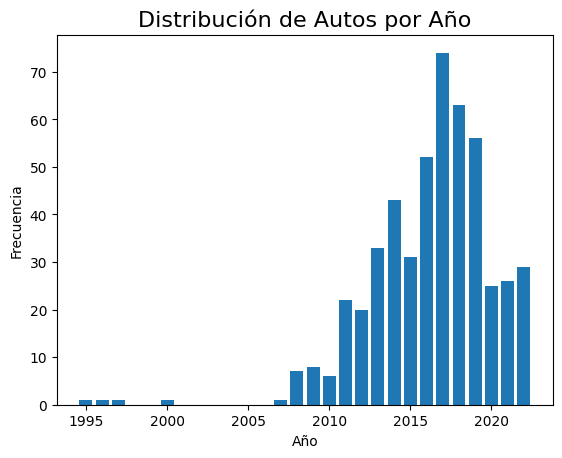

In [ ]:
# Contamos la frecuencia de cada año
conteo_años = data['Año'].value_counts()

# Creamos el gráfico de barras
plt.bar(conteo_años.index, conteo_años.values)

# Configuramos etiquetas y título
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Distribución de Autos por Año', fontsize=16)

# Mostramos el gráfico
plt.show()

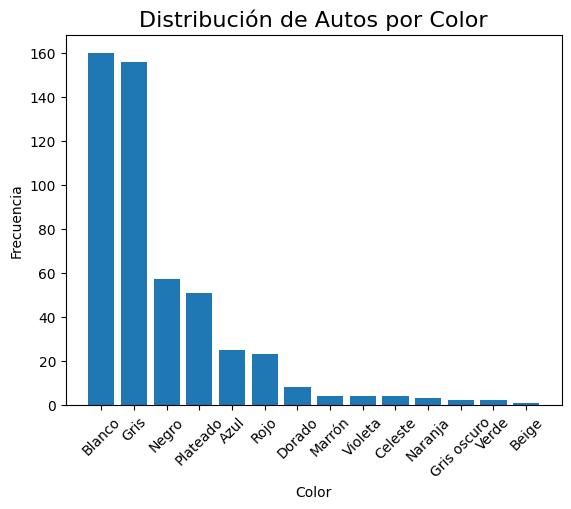

In [ ]:
# Contamos la frecuencia de cada año
conteo_color = data['Color'].value_counts()

# Creamos el gráfico de barras
plt.bar(conteo_color.index, conteo_color.values)

# Rotamos las etiquetas del eje 'x' para que se lean bien los valores
plt.xticks(rotation=45)  # Aquí se puede ajustar el ángulo de rotación

# Configuramos etiquetas y título
plt.xlabel('Color')
plt.ylabel('Frecuencia')
plt.title('Distribución de Autos por Color', fontsize=16)

# Mostramos el gráfico
plt.show()

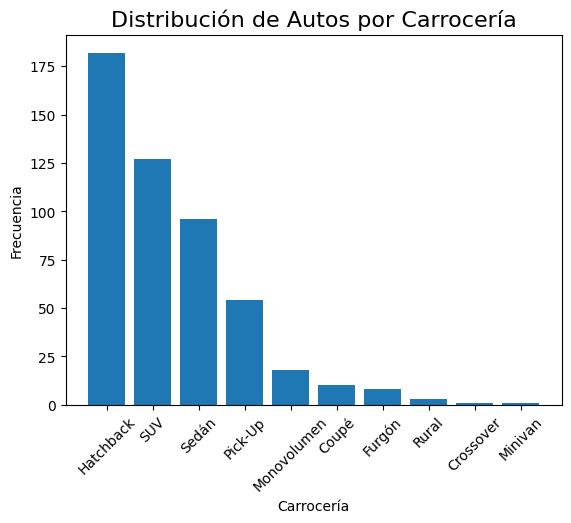

In [ ]:
# Contamos la frecuencia de cada año
conteo_carroceria = data['Carrocería'].value_counts()

# Creamos el gráfico de barras
plt.bar(conteo_carroceria.index, conteo_carroceria.values)

# Rotamos las etiquetas del eje 'x' para que se lean bien los valores
plt.xticks(rotation=45)  # Aquí se puede ajustar el ángulo de rotación

# Configuramos etiquetas y título
plt.xlabel('Carrocería')
plt.ylabel('Frecuencia')
plt.title('Distribución de Autos por Carrocería', fontsize=16)

# Mostramos el gráfico
plt.show()

<br>
<br>

Para las columnas donde hay almacenados datos bivariantes podemos generar gráficos de torta (pie chart), ya que representan mejor esta información. Nosotros tenemos datos bivariantes en las columnas `Caja` y `Moneda`.

En el primer gráfico `conteo_caja.values` son los valores que se usarán para el tamaño de cada porción del gráfico; con `labels=conteo_caja.index` generamos las etiquetas para cada porción del gráfico; y con `autopct='%1.1f%%'` damos formato para mostrar los porcentajes dentro de cada porción:


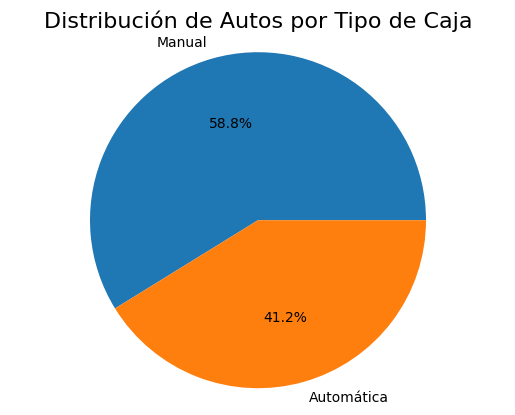

In [ ]:
# Calculamos la frecuencia de cada valor en la columna 'Caja'
conteo_caja = data['Caja'].value_counts()

# Creamos el gráfico de torta
plt.pie(conteo_caja.values, labels=conteo_caja.index, autopct='%1.1f%%')

# Añadimos un título
plt.title('Distribución de Autos por Tipo de Caja', fontsize=16)

# Nos aseguramos que el gráfico sea un círculo
plt.axis('equal')

# Mostramos el gráfico
plt.show()

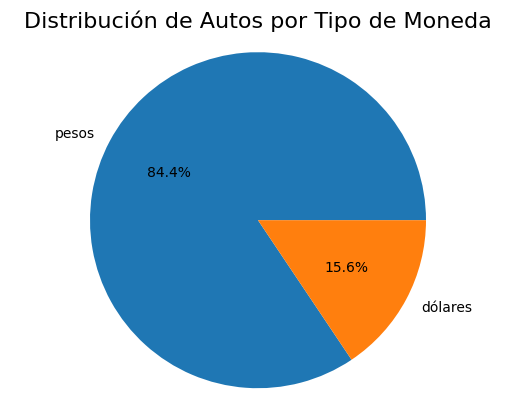

In [ ]:
# Calculamos la frecuencia de cada valor en la columna 'Moneda'
conteo_moneda = data['Moneda'].value_counts()

# Creamos el gráfico de torta
plt.pie(conteo_moneda.values, labels=conteo_moneda.index, autopct='%1.1f%%')

# Añadimos un título
plt.title('Distribución de Autos por Tipo de Moneda', fontsize=16)

# Nos aseguramos que el gráfico sea un círculo
plt.axis('equal')

# Mostramos el gráfico
plt.show()

<br>
<br>

Una opción de gráfico muy interesante para mostrar es el gráfico de "Treemap", también llamado gráfico de mosaico o gráfico de área rectangular. Es interesante sobre todo cuando se tienen valores muy variados, porque se puede representar visualmente a todos de una sola vez.

Hay que tener en cuenta que no se puede generar un gráfico de Treemap con `pyplot` directamente ya que esta librería no tiene una función específica para crear gráficos de Treemap. Sin embargo, se puede utilizar la biblioteca `squarify` para crear un gráfico de Treemap en Python. `squarify` proporciona una función llamada `squarify.plot` que se puede utilizar para crear Treemaps.


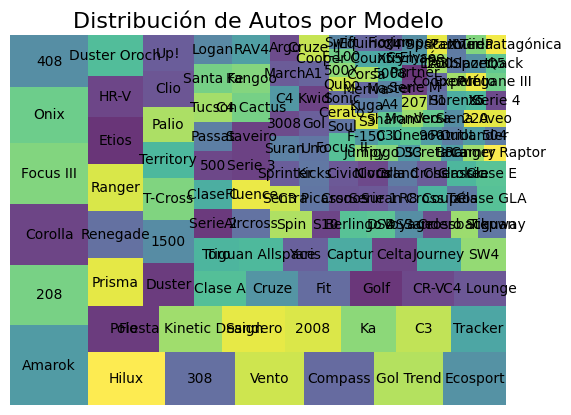

In [ ]:
# Instalamos e importamos la biblioteca
!pip install squarify
import squarify

# Calculamos la frecuencia de cada modelo
conteo_modelo = data['Modelo'].value_counts()

# Extraemos los valores de frecuencia como una lista, que serán usados como tamaños
# para los rectángulos en el treemap
# Multiplicamos todo por 2 para aumentar el tamaño de los rectángulos
sizes = conteo_modelo.values * 2

# Extraemos los nombres de los modelos como una lista, que serán usados como
# etiquetas para los rectángulos
labels = conteo_modelo.index

# Creamos el treemap
squarify.plot(sizes=sizes, label=labels, alpha=.8)

# Ajustamos el diseño
plt.axis('off')
plt.title('Distribución de Autos por Modelo', fontsize=16)

# Muestramos el gráfico
plt.show()

<br>
<br>

Por último, para determinar si los datos son simétricos o asimétricos, vamos a utilizar gráficos de distribución de frecuencias, en nuestro caso histogramas. Este gráfico muestra la frecuencia de los valores de una variable en función de su distancia a la media de la distribución. Si la distribución es simétrica, el gráfico tendrá una forma de campana, con la mayoría de los valores concentrados en torno a la media y una cola que se extiende hacia ambos lados de manera simétrica.

En el caso de una distribución asimétrica, el gráfico mostrará una cola más larga hacia un lado que hacia el otro, lo que indica que los valores están más dispersos en una dirección específica. La asimetría puede ser positiva (a la derecha) o negativa (a la izquierda).

<br>

En este proyecto vamos a analizar la distribución de frecuencias del tamaño del `Motor` y la cantidad de `Kilómetros` que tiene el vehículo (el resto de las medidas descriptivas de las variables en base a su tipo ya se entregaron con la primera parte, la cual está desarrollada más arriba en esta misma notebook):


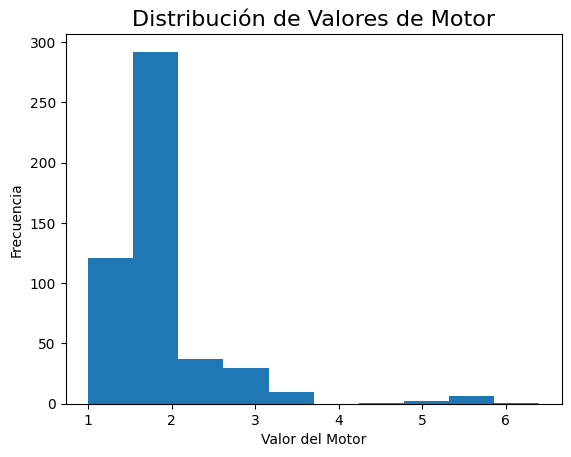

In [ ]:
plt.hist(data['Motor'], bins=10)  # Ajustamos el número de bins según sea necesario
plt.xlabel('Valor del Motor')
plt.ylabel('Frecuencia')
plt.title('Distribución de Valores de Motor', fontsize=16)
plt.show()

**Aclaración:** en un histograma, los `bins` (o "contenedores") son los intervalos en los que se divide el rango total de valores de la variable numérica que se está analizando. Cada bin representa un rango específico de valores, y la altura de la barra correspondiente a ese bin indica la frecuencia (cantidad de observaciones) que caen dentro de ese rango.

Por ejemplo, si se está analizando la columna `Motor` y estableces `bins=10`, el histograma dividirá el rango de valores de `Motor` en 10 intervalos iguales. Cada barra del histograma mostrará cuántos autos tienen un valor de `Motor` dentro de cada uno de esos intervalos.

*Como se puede ver, en nuestro conjunto de valores para el tamaño del `Motor`, tenemos una distribución asimétrica positiva.*


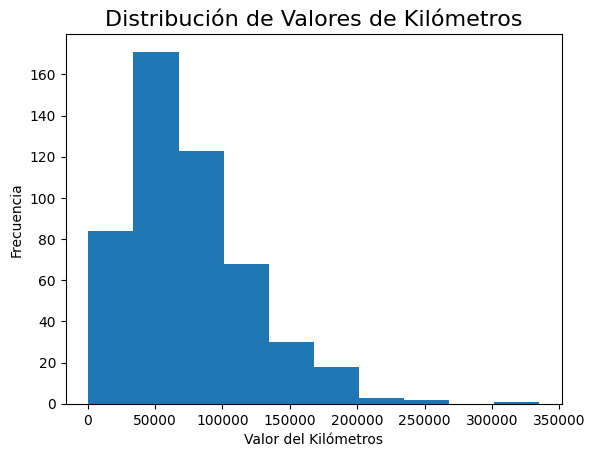

In [ ]:
plt.hist(data['Kilómetros'], bins=10)  # Ajustamos el número de bins según sea necesario
plt.xlabel('Valor del Kilómetros')
plt.ylabel('Frecuencia')
plt.title('Distribución de Valores de Kilómetros', fontsize=16)
plt.show()

*Misma forma de distribución asimétrica que antes, pero ahora se puede observar con más claridad.*
